In [1]:
import pandas as pd

### Создаем признаки (features) из Bag of Words

Как превратить текст в некоторое численное представление для машинного обучения? Один из таких подходов называется мешком слов (Bag of Words). Модель Bag of Words изучает все слова, которые есть в нашем корпусе, а затем моделирует каждый документ, подсчитывая количество раз, когда появляется каждое слово. Например, рассмотрим следующие два предложения:

Предложение 1: "The cat sat on the hat"

Предложение 2: "The dog ate the cat and the hat"

Для этих двух сообщений,получим следующий словарь:

{ the, cat, sat, on, hat, dog, ate, and }

Чтобы получить наш мешок слов, мы подсчитаем сколько раз каждое слово появилось в предложении. In В предложение 1, "the" появилось два раза, а "cat", "sat", "on", и "hat" по одному разу каждый. Поэтому вектор признаков для этого предложения выглядит так:

{ the, cat, sat, on, hat, dog, ate, and }

{ 2, 1, 1, 1, 1, 0, 0, 0 }

Аналогично, признаки предложения 2 будут такими: 

{ 3, 1, 0, 0, 1, 1, 1, 1}

## Как перевести текст в признаки?

Если наша задача типовая, то скорее всего в sklearn уже есть библиотека, с помощью которой можно ее решить. Мы будем пользоваться классом CountVectorizer(), который при обучении создает признаки из всех слов обучающей выборки, при трансформации - подсчитывает встречание этих слов в тренировочной и тестовой выборке. А потом получившиеся наборы данных мы уже передаем алгоритмам для предсказания.

In [2]:
# создадим тренировочный список текстов
simple_train = ['call you tonight', 'Call me a cab', 'call 222-22-22', 'please call me.. please']

In [3]:
# Импортируем и иниициализируем класс CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [4]:
# обучаемся на данных
vect.fit(simple_train)

CountVectorizer()

In [5]:
# Смотрим сгенерированные признаки
vect.get_feature_names()


C:\Users\mbbur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['22', '222', 'cab', 'call', 'me', 'please', 'tonight', 'you']

Обратите внимание, что в наш векторайзер уже зашита базовая обработка текста. Он приводит текст к нижнему регистру, и с помощью регулярок забирает только слова, состоящие из цифр и букв (знаки препинания удаляются).

Метод fit мы уже видели в других алгоритмах, а вот transform преобразует данные, если такое требуется по результатам "обучения".

In [6]:
# преобразовываем исходный текст в матрицу признаков
simple_train_matrix = vect.transform(simple_train)
# каждый ряд - одно наблюдение (наш документ), каждая колонка - один признак (слово). 
# На пересечении - количество слов в документе.
simple_train_matrix

<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [7]:
simple_train_matrix.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 0],
       [2, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 2, 0, 0]], dtype=int64)

*sparse matrix*

Разряженная матрица. Хранит только координаты ненулевых значений. Сильно экономит место. 

*dense matrix*

Плотная матрица. Хранит все данные.
Если у вас матрица 1000 на 1000 из нулей - она все это хранит (1 мб ничего).

In [8]:
pd.DataFrame(simple_train_matrix.toarray(), columns=vect.get_feature_names())

,22,222,cab,call,me,please,tonight,you
0,0,0,0,1,0,0,1,1
1,0,0,1,1,1,0,0,0
2,2,1,0,1,0,0,0,0
3,0,0,0,1,1,2,0,0


In [9]:
print('sparse matrix')
print(simple_train_matrix)

print('dense matrix')
print(simple_train_matrix.toarray())

sparse matrix
  (0, 3)	1
  (0, 6)	1
  (0, 7)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (2, 0)	2
  (2, 1)	1
  (2, 3)	1
  (3, 3)	1
  (3, 4)	1
  (3, 5)	2
dense matrix
[[0 0 0 1 0 0 1 1]
 [0 0 1 1 1 0 0 0]
 [2 1 0 1 0 0 0 0]
 [0 0 0 1 1 2 0 0]]


In [10]:
# создадим текст для теста и преобразуем обученным CountVectorizer
simple_test = ['Please don\'t call me, I will be busy']
simple_test_matrix = vect.transform(simple_test)
simple_test_matrix.toarray()

array([[0, 0, 0, 1, 1, 1, 0, 0]], dtype=int64)

In [11]:
# куда делся don't?
pd.DataFrame(simple_test_matrix.toarray(), columns=vect.get_feature_names())


C:\Users\mbbur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,22,222,cab,call,me,please,tonight,you
0,0,0,0,1,1,1,0,0


Transform для тестовой выборки будет игнорировать токены, которые он не видел раньше (поэтому важен большой размер обучающей выборки и ее репрезентативность корпуса текстов).

### Стемминг (Stemming) и Лемматизация (Lemmatization)

Процесс стемминга заключается в преобразовании различных вариантов одного и того же слова в одну ядерную форму. Например у нас есть слова "running", "runs" и "run", которые семантически говорят об одном и том же, поэтому мы можем вместо них использовать одно слово "run". Стоит отметить, что в этом случае мы можем потерять некоторые грамматические признаки, например форму времени.

Воспользуемся алгоритмом Портера из модуля NLTK. Посмотрим на работу алгоритма на примере с вариантами слов run

In [12]:
import nltk

stemmer = nltk.stem.PorterStemmer()

print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


Мы успешно обрезали наши слова до базовой формы.

Однако у стемминга есть тенденция к "грубому" обрезанию концов слов. Например, для leaves мы получим следующее:

In [13]:
print("The stemmed form of leaves is: {}".format(stemmer.stem("leaves")))

The stemmed form of leaves is: leav


С одной стороны это нормально, но базовой формой слова будет leaf. Поэтому на помощь нам приходит лемматизация.

Лемматизация пытается достигнуть того же эффекта, но в отличие от стеммера, лемматизация использует реальный словарь слов и поэтому не будет обрубать окончания слов, а будет возвращать лемму.

Снова воспользуемся модулем NLTK и проверим, что он нам выдаст на leaves:

In [14]:
# Импортируем
from nltk.stem import WordNetLemmatizer
# Инициализируем 
lemm = WordNetLemmatizer()

print("The lemmatized form of leaves is: {}".format(lemm.lemmatize("leaves")))

The lemmatized form of leaves is: leaf


Получили верный ответ. Лемматизация обеспечивает нам более тонкую настройку по сравнению со стеммингом. Но чтобы интегрировать лемматизацию в count vectorizer, очистку текста придется делать сначала вручную (см. ниже).

С поддержкой русского языка у nltk не супер, к сожалению. Есть другие библиотеки, например,  
https://pymorphy2.readthedocs.io/en/latest/

In [15]:
from nltk.stem.snowball import RussianStemmer

rus_stemmer = RussianStemmer()

print(rus_stemmer.stem('бежать'))
print(rus_stemmer.stem('бегущий'))
print(rus_stemmer.stem('бегающий'))

бежа
бегущ
бега


# Are those news fake or real?
У нас есть датасет состоящий из заголовка новости, текста новости и лейбла, который показывает фейковая это новость или реальная.

Нашей задачей будет натренировать модель, чтобы она могла определить фейковая новость или реальная.

### Загружаем данные

In [16]:
data = pd.read_csv("fake_or_real_news.csv", header=0)

In [17]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [18]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

Три основных столбца называются "title", "text", и "label".

Разделим наши данные на обучающую и тестовую выборки, чтобы потом можно было проверить насколько качественно работает наш алгоритм. За y обозначим наш лейбл. За X саму колонку с текстом новостей.

In [19]:
y = data['label']
X = data[['text']] # двойные скобки, чтобы она осталась датафреймом

Для разделения данных на тестовую и обучающую выборки, воспользуемся функцией train_test_split из модуля sklearn. Как видно из названия она делит выборку на части и размещает данные по выбранным массивам. Test_size указывает на то, какую часть выборки нужно отложить для теста.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33,random_state=53)

Теперь, когда мы разбили данные и получили обучающую выборку, посмотрим как выглядит текст новости. Выведем любую новость

In [21]:
X_train.shape

(4244, 1)

In [22]:
X_test.shape

(2091, 1)

In [23]:
print(X_train.iloc[1,0])

Report Copyright Violation Do you think there will be as many doom sayers if trump should get in office ? I notice here at GLP the amount of doom sayers seems to go down when a republican is in office (Bush). But when the left get in office the doomsaying increases. Now i am sure the effect is opposite. If trump gets in office i am sure the doomsaying will increase on the left side of the political spectrum. Page 1


Иногда внутри текста мы можем иногда увидить HTML тэги (например "br"), аббревиатуры, пунктуацию, которые являются распространенными проблемы при обработке текста из Интернета. Но вроде в наших данных этого нет.

### Чистка данных и предварительная обработка текста

Пунктуацию, числа и стоп-слова можно убрать с помощью NLTK и регулярных выражений.
Когда мы очищаем текст, нужно сначала подумать о том какую задачу мы решаем. Для многих задач есть смысл в том, чтобы убрать пунктуацию. С другой стороны, мы решаем задачу анализа настроений (sentiment) и есть вероятность, что "!!!" или ":-(" может нести в себе какое-то настроение и должно считаться словом. В этом задании, мы убираем пунктуацию, но в качестве эксперимента вы можете ее оставить и посмотреть как это повлияет на финальный результат.

Аналогично мы уберем числа, но обычно,тут также есть различные варианты как с ними можно поступить в зависимости от ситуации. Например, мы их можем считать словами или заменять их плейсхолдером "NUM".

Чтобы убрать пунктуацию и числа, воспользуемся модулем re, который позволяет нам использовать регулярные выражения.

In [24]:
example = X_train.iloc[4,0]
example

'Wells Fargo is Rotting from the Top Down Wells Fargo is Rotting from the Top Down By 0 139 \nJust when you thought that, surely, big banker greed had bottomed out with 2008’s Wall Street crash and bailout, along comes Wells Fargo, burrowing even deeper into the ethical slime to reach a previously unimaginable level of corporate depravity. \nIt’s one thing for these finance giants to cook the books or defraud investors, but top executives of Wells Fargo have been profiteering for years by literally forcing their employees to rob the bank’s customers. \nRather than a culture of service, executives have pushed a high-pressure sales culture since 2009, demanding frontline employees meet extreme quotas of selling a myriad of unnecessary bank products to common depositors who just wanted a simple checking account. (Photo: Shutterstock) \nEmployees were expected to load each customer with at least eight accounts, and employees were monitored constantly on meeting their quota — fail and you’d

In [25]:
lower_case = example.lower()        # Конвертируем в нижний регистр

In [26]:
import re
letters_only = re.findall(r'[a-z]+', lower_case) # находим только последовательности букв
                                              # также findall уже вернет текст в виде списка (токенов)
print(letters_only)

['wells', 'fargo', 'is', 'rotting', 'from', 'the', 'top', 'down', 'wells', 'fargo', 'is', 'rotting', 'from', 'the', 'top', 'down', 'by', 'just', 'when', 'you', 'thought', 'that', 'surely', 'big', 'banker', 'greed', 'had', 'bottomed', 'out', 'with', 's', 'wall', 'street', 'crash', 'and', 'bailout', 'along', 'comes', 'wells', 'fargo', 'burrowing', 'even', 'deeper', 'into', 'the', 'ethical', 'slime', 'to', 'reach', 'a', 'previously', 'unimaginable', 'level', 'of', 'corporate', 'depravity', 'it', 's', 'one', 'thing', 'for', 'these', 'finance', 'giants', 'to', 'cook', 'the', 'books', 'or', 'defraud', 'investors', 'but', 'top', 'executives', 'of', 'wells', 'fargo', 'have', 'been', 'profiteering', 'for', 'years', 'by', 'literally', 'forcing', 'their', 'employees', 'to', 'rob', 'the', 'bank', 's', 'customers', 'rather', 'than', 'a', 'culture', 'of', 'service', 'executives', 'have', 'pushed', 'a', 'high', 'pressure', 'sales', 'culture', 'since', 'demanding', 'frontline', 'employees', 'meet', 'e

Наконец, нам нужно решить, что делать с часто встречающимися словами, которые не несут большого значения. Такие слова называются "стоп-словами"; в Английском языке это такие слова, как "a", "and", "is", и "the". Удобно, что в Питоне есть встроенный модуль по работе со стоп-словами. Давайте импортируем список стоп-слов из модуля Natural Language Toolkit (NLTK). Помимио самого модуля, нужно еще установить пакеты слов:

In [27]:
import nltk
nltk.download("stopwords")  
# Скачиваем нужные нам наборы. Необязательно скачивать все. Нам пока что нужен только
# corpora stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbbur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Теперь мы можем использовать nltk для получения списка стоп-слов:

In [28]:
from nltk.corpus import stopwords # Импортируем список стол-слов
print(stopwords.words("english")) # Стоп-слова для английского языка

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
print(stopwords.words("russian")) # Стоп-слова для русского языка

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

Чтобы убрать стоп-слова из нашей новости, сделаем так:

In [30]:
# Убираем стоп-слова из "words"
words = [w for w in letters_only if not w in stopwords.words("english")]
print(words)

['wells', 'fargo', 'rotting', 'top', 'wells', 'fargo', 'rotting', 'top', 'thought', 'surely', 'big', 'banker', 'greed', 'bottomed', 'wall', 'street', 'crash', 'bailout', 'along', 'comes', 'wells', 'fargo', 'burrowing', 'even', 'deeper', 'ethical', 'slime', 'reach', 'previously', 'unimaginable', 'level', 'corporate', 'depravity', 'one', 'thing', 'finance', 'giants', 'cook', 'books', 'defraud', 'investors', 'top', 'executives', 'wells', 'fargo', 'profiteering', 'years', 'literally', 'forcing', 'employees', 'rob', 'bank', 'customers', 'rather', 'culture', 'service', 'executives', 'pushed', 'high', 'pressure', 'sales', 'culture', 'since', 'demanding', 'frontline', 'employees', 'meet', 'extreme', 'quotas', 'selling', 'myriad', 'unnecessary', 'bank', 'products', 'common', 'depositors', 'wanted', 'simple', 'checking', 'account', 'photo', 'shutterstock', 'employees', 'expected', 'load', 'customer', 'least', 'eight', 'accounts', 'employees', 'monitored', 'constantly', 'meeting', 'quota', 'fail'

Метод ищет каждое стоп-слово в списке наших слов "words", и удаляет если это слово есть.

А теперь применим лемматизацию.

In [31]:
lemm = WordNetLemmatizer()
words_lemmatized = []
for word in words:
    print(word, '-', lemm.lemmatize(word))
    words_lemmatized.append(lemm.lemmatize(word))

wells - well
fargo - fargo
rotting - rotting
top - top
wells - well
fargo - fargo
rotting - rotting
top - top
thought - thought
surely - surely
big - big
banker - banker
greed - greed
bottomed - bottomed
wall - wall
street - street
crash - crash
bailout - bailout
along - along
comes - come
wells - well
fargo - fargo
burrowing - burrowing
even - even
deeper - deeper
ethical - ethical
slime - slime
reach - reach
previously - previously
unimaginable - unimaginable
level - level
corporate - corporate
depravity - depravity
one - one
thing - thing
finance - finance
giants - giant
cook - cook
books - book
defraud - defraud
investors - investor
top - top
executives - executive
wells - well
fargo - fargo
profiteering - profiteering
years - year
literally - literally
forcing - forcing
employees - employee
rob - rob
bank - bank
customers - customer
rather - rather
culture - culture
service - service
executives - executive
pushed - pushed
high - high
pressure - pressure
sales - sale
culture - cult

Видим, что лемматайзер в основном привел нам третью форму глагола к инфинитиву и множественное число к единтсвенному.

### Объединяем все вместе
Теперь у нас есть полный код, чтобы отчистить новость от всего лишнего. Запишем его в функцию для удобства обработки большого количества новостей:

In [32]:
def news_to_words(raw_news):

    # 1. Переводим в нижний регистр и разбиваем на токены
    lower_case = raw_news.lower()
    
    # 2. Оставляем только буквы + findall венрнет нам список      
    letters_only = re.findall(r'[a-z]+', lower_case)

    # 3. В Питоне поиск в множествах (set) быстрее чем поиск в
    #   списках, конвертируем список стоп-слов в множество
    stops = set(stopwords.words("english"))                  
    # 
    # 4. Убираем стоп-слова
    meaningful_words = [w for w in letters_only if not w in stops]   
    #
    # 6. Объединяем все слова вместе в одну строчку, разделяя слова пробелом, 
    # и возвращаем результат
    lemmatized = [lemm.lemmatize(word) for word in meaningful_words]
    
    return( " ".join(lemmatized))   

Мы дальше увидим, что это можно делать и автоматически. Но если мы используем лемматайзер, то ему лучше бы уже передать "чистый" текст в нижнем регистре. Поэтому полезно уметь это реализовывать, если вы решаете задачки посложнее.

В этой функции есть два новых элемента. Во-первых, мы конвертировали список стоп-слов в другой тип данных - множество. Это сделано для ускорения, т.к. мы будем вызывать эту функцию десятки тысяч раз, и она должна работать быстро, а поиск в множествах гораздо быстрее в Питоне, чем поиск в списках.

Во-вторых, мы объединили все слова в один параграф. Это сделает вывод слов более удобным для функции Bag of Words. Вызывем функцию и проверим на нашем новости.

In [33]:
clean_news = news_to_words(X_train.iloc[4,0])
print(clean_news)

well fargo rotting top well fargo rotting top thought surely big banker greed bottomed wall street crash bailout along come well fargo burrowing even deeper ethical slime reach previously unimaginable level corporate depravity one thing finance giant cook book defraud investor top executive well fargo profiteering year literally forcing employee rob bank customer rather culture service executive pushed high pressure sale culture since demanding frontline employee meet extreme quota selling myriad unnecessary bank product common depositor wanted simple checking account photo shutterstock employee expected load customer least eight account employee monitored constantly meeting quota fail fired boss sale culture turned employee syndicate bank robber thievery systemic subtle half million customer secretly issued credit debit card request fake email account online service set without customer knowledge depositor money moved one account another signature forged course well fargo collected fe

Мы должны получить точно такой же ответ, как и в варианте когда мы делали все преобразования без функции. Теперь пройдем циклом по всей обучающей выборке( это может занять некоторое время, в зависимости от мощности вашего компьютера). Иногда, когда вы работаете с данными, неплохо создавать такие принты, что понимать, на каком сейчас этапе обработка.

In [34]:
X_train['clean'] = X_train['text'].apply(news_to_words)

In [35]:
X_train.head()

,text,clean
2576,,
1539,Report Copyright Violation Do you think there ...,report copyright violation think many doom say...
5163,"The election in 232 photos, 43 numbers and 131...",election photo number quote two candidate center
2615,Email Ever wonder what’s on the mind of today’...,email ever wonder mind today notable people we...
4270,Wells Fargo is Rotting from the Top Down Wells...,well fargo rotting top well fargo rotting top ...


# Продолжим с новостями

In [36]:
# Инициализируем объект "CountVectorizer", метод для работы с bag of words
# из scikit-learn
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) # ограничиваем максимальное
                                # количество слов-признаков для ускорения
                                # работы алгоритма. Если не ограничивать -
                                # количество признаков будет равно всем
                                # уникальным словам в нашем корпусе выборки

# fit_transform() делает две вещи: Сначала он фитит модель
# и изучает словарь; Потом трансформирует нашу обучающую выборку
# в вектор признаков В fit_transform мы передаем список слов
train_data_features = vectorizer.fit_transform(X_train['clean'])

# Используем удобные массивы из Numpy
train_data_features = train_data_features.toarray()

Посмотрим как выглядят наши обучающие данные:

In [37]:
print(train_data_features.shape)

(4244, 5000)


In [38]:
train_data_features[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

В ней 4244 строк и 5,000 признаков (по одному на каждое слово в словаре).

Стоит отметить, что CountVectorizer идет со встроенными опциями по автоматическому препроцессингу, токенезации и удаленю стоп-слов -- для каждой из этих опций, мы могли вместо "None", использовать встроенные методы или указать свою функцию, которая это сделает.

Теперь наша модель Bag of Words натренирована, посмотрим на получившийся словарь:

In [39]:
vocab = vectorizer.get_feature_names()
print(vocab)

['abandon', 'abandoned', 'abc', 'abdeslam', 'abdullah', 'abedin', 'ability', 'able', 'abortion', 'abroad', 'absence', 'absolute', 'absolutely', 'absurd', 'abuse', 'academic', 'academy', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accident', 'accommodation', 'accompanied', 'accomplish', 'accomplished', 'accord', 'according', 'account', 'accountability', 'accountable', 'accurate', 'accusation', 'accuse', 'accused', 'accusing', 'achieve', 'achieved', 'achievement', 'acknowledge', 'acknowledged', 'acknowledging', 'across', 'act', 'acted', 'acting', 'action', 'activation', 'active', 'actively', 'activism', 'activist', 'activity', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'address', 'addressed', 'addressing', 'administration', 'administrator', 'admiral', 'admission', 'admit', 'admits', 'admitted', 'admitting', 'adopt', 'adopted', 'adult', 'advance', 'advanced', 'advantage', 'advertisement', '

C:\Users\mbbur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Дополнительно, можно вывести сколько раз слово встречается в словаре:

In [40]:
import numpy as np

# Подсчитаем количество слов в наших данных
dist = np.sum(train_data_features, axis=0)

# Выведем для каждого слова его количество
for tag, count in zip(vocab, dist):
    print(count, tag)

70 abandon
80 abandoned
205 abc
48 abdeslam
69 abdullah
232 abedin
454 ability
859 able
456 abortion
145 abroad
79 absence
95 absolute
282 absolutely
60 absurd
217 abuse
113 academic
66 academy
300 accept
78 acceptable
71 acceptance
151 accepted
71 accepting
598 access
64 accident
53 accommodation
63 accompanied
61 accomplish
63 accomplished
56 accord
2089 according
607 account
91 accountability
109 accountable
90 accurate
164 accusation
63 accuse
345 accused
84 accusing
134 achieve
91 achieved
89 achievement
97 acknowledge
176 acknowledged
49 acknowledging
977 across
1305 act
62 acted
164 acting
1355 action
48 activation
193 active
107 actively
50 activism
492 activist
458 activity
117 actor
270 actual
1161 actually
360 ad
127 adam
415 add
854 added
334 adding
270 addition
259 additional
75 additionally
643 address
134 addressed
96 addressing
1558 administration
48 administrator
116 admiral
63 admission
103 admit
62 admits
163 admitted
53 admitting
75 adopt
95 adopted
186 adult
252 ad

### Случайный лес (Random Forest)
В данный момент у нас есть численные значения признаков из обучающей выборки из Bag of Words и оригинальные лейблы новости, поэтому займемся обучением с учителем. Мы будем использовать классификатор Random Forest. Этот алгоритм включен в scikit-learn. Ниже мы указываем количество деревьев в 100 штук. Больше деревьев может улучшить (или не улучшить) результат, но в любом случае булет исполняться дольше. Аналогично, чем больше признаков будет для каждой новости, тем больше времени это займет.

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Инициализируем Random Forest classifier 100 деревьями
forest = RandomForestClassifier(n_estimators = 100) 

# Обучаем лес на нашей обучающей выборке
forest = forest.fit(train_data_features, y_train)

### Делаем предсказывание
Осталось только запустить подготовленный Random Forest на нашей тестовой выборке и проверить результаты предсказания.

Стоит отметить, что для тестовой выборки мы уже используем метод "transform", а не "fit_transform" в Bag of Words.

Но для начала преобразуем нашу тестовую выборку в bag of words.

In [42]:
# очищаем тестовую подвыбоку
X_test['clean'] = X_test['text'].apply(news_to_words)

# Конвертируем получившиеся bag of words в массив Numpy
test_data_features = vectorizer.transform(X_test['clean'])
test_data_features = test_data_features.toarray()

# Делаем предсказание нашим Random Forest
result = forest.predict(test_data_features)

Теперь проверим насколько точно были предсказания.

In [43]:
from sklearn import metrics

metrics.accuracy_score(y_test, result)

0.9053084648493543

90% - Отличный результат.

Посмотрим какие признаки повлияли на наш результат. Алгоритм случайного леса устроен так, что во время своей работы он выбирает наиболее важные признаки с его точки зрения (важные они, потому что удачнее всего разбивают выборку).

In [44]:
import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_

Обработаем их и отсортируем по убыванию. Получим также имена наших признаков.

In [45]:
#индексы для сортировки признаков по убыванию от наиболее важного
indices = np.argsort(importances)[::-1]
#название признаков из нашего векторайзера
feature_names = vectorizer.get_feature_names()

C:\Users\mbbur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Выведем 30 самых важных

In [46]:
print("Feature ranking:")

for f in range(30): 
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))


Feature ranking:
1. feature said (0.024491)
2. feature republican (0.010881)
3. feature october (0.010771)
4. feature obama (0.009475)
5. feature conservative (0.007501)
6. feature sen (0.007433)
7. feature president (0.007319)
8. feature ted (0.006380)
9. feature gop (0.006150)
10. feature state (0.005866)
11. feature primary (0.005618)
12. feature com (0.005528)
13. feature rubio (0.005411)
14. feature share (0.005030)
15. feature article (0.004572)
16. feature thursday (0.004307)
17. feature candidate (0.004286)
18. feature week (0.004082)
19. feature hillary (0.004080)
20. feature house (0.004056)
21. feature senate (0.004043)
22. feature senator (0.003907)
23. feature monday (0.003723)
24. feature administration (0.003720)
25. feature told (0.003615)
26. feature cruz (0.003603)
27. feature nomination (0.003552)
28. feature party (0.003514)
29. feature convention (0.003354)
30. feature governor (0.003352)


Как мы видим, самый первый признак очень важен, остальные постепено утрачивают своб значимость.
Теперь отобразим важности на столбчатом графике. Чтобы улучшить график - нужно вывести еще названия признаков по шкале x.

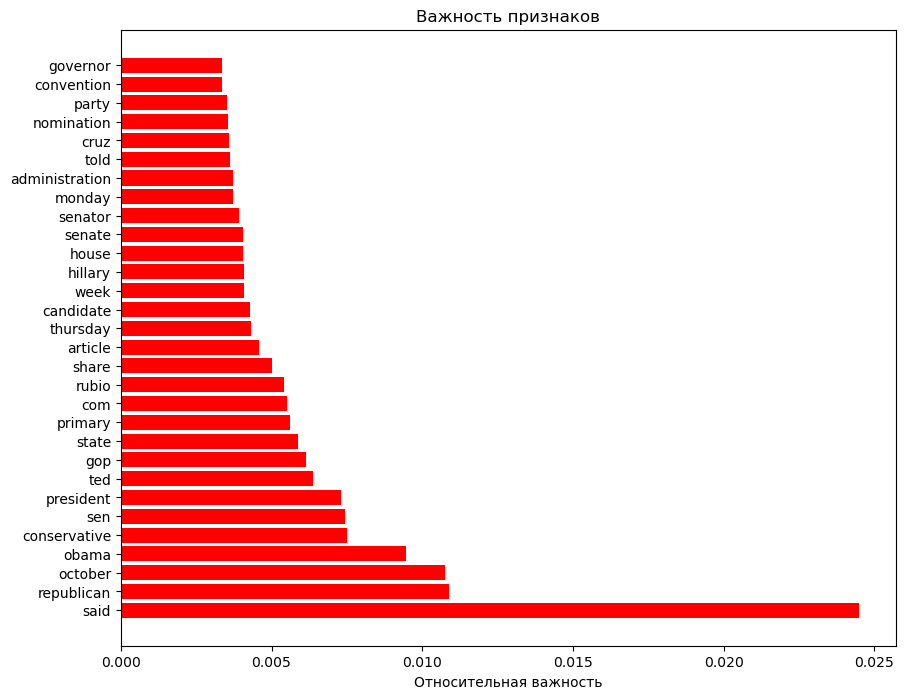

In [47]:
i = importances[indices]

plt.figure(figsize=(10, 8))
plt.title('Важность признаков')
plt.barh(range(0,30),i[:30], color='r', align='center')
plt.yticks(range(0,30), [feature_names[indices[i]] for i in range(0,30)])
plt.xlabel('Относительная важность')
plt.show()